<a href="https://www.kaggle.com/code/mosesmoncy/twitter-validation?scriptVersionId=126871230" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Twitter is a platform where most of the people express their feelings towards the current context. As humans, we can guess the sentiment of a sentence whether it is positive or negative. Similarly, in this project, I’m going to show you how to train and develop a simple Twitter Sentiment Analysis supervised learning model using python and NLP libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re  # regular expression ==> used to remove special characters


In [2]:
a=pd.read_csv('/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv',encoding='ISO-8859-1')
# we gave encoding (ISO)==> to read all the symbols,emojis if present inside the dataframe
a.columns=('id','location','target','text')
a

,id,location,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [3]:
a.head

<bound method NDFrame.head of        id             location      target  \
0     352               Amazon     Neutral   
1    8312            Microsoft    Negative   
2    4371                CS-GO    Negative   
3    4433               Google     Neutral   
4    6273                 FIFA    Negative   
..    ...                  ...         ...   
994  4891  GrandTheftAuto(GTA)  Irrelevant   
995  4359                CS-GO  Irrelevant   
996  2652          Borderlands    Positive   
997  8069            Microsoft    Positive   
998  6960      johnson&johnson     Neutral   

                                                  text  
0    BBC News - Amazon boss Jeff Bezos rejects clai...  
1    @Microsoft Why do I pay for WORD when it funct...  
2    CSGO matchmaking is so full of closet hacking,...  
3    Now the President is slapping Americans in the...  
4    Hi @EAHelp Iâve had Madeleine McCann in my c...  
..                                                 ...  
994  â­ï¸ Toront

In [4]:
a.tail()

,id,location,target,text
994,4891,GrandTheftAuto(GTA),Irrelevant,â­ï¸ Toronto is the arts and culture capital...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
998,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [5]:
a.shape

(999, 4)

In [6]:
a.dtypes

id           int64
location    object
target      object
text        object
dtype: object

In [7]:
a.isna().sum()

id          0
location    0
target      0
text        0
dtype: int64

<AxesSubplot:>

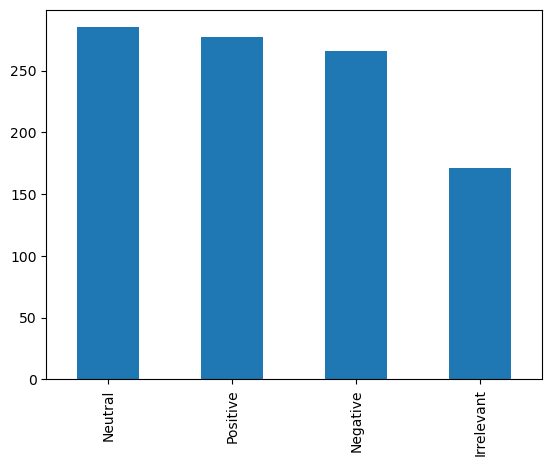

In [8]:
a.target.value_counts().plot(kind='bar')

In [9]:
a['target'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    171
Name: target, dtype: int64

<AxesSubplot:>

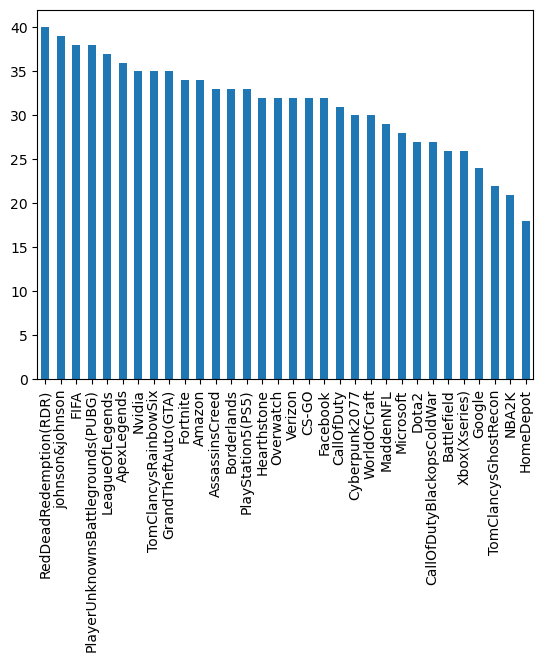

In [10]:
a.location.value_counts().plot(kind='bar')

In [11]:
# dropping irrelevant rows from 'target'

a.drop(a.index[(a['target']=='Irrelevant')],axis=0,inplace=True)
a

,id,location,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
992,314,Amazon,Negative,Please explain how this is possible! How can t...
993,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
996,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [12]:
# reset index

a.reset_index(drop=True,inplace=True)
a

,id,location,target,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so itâs time to drink wine n pl...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [13]:
#dropping 'id' and 'location'

a=a.drop(['id','location'],axis=1)


In [14]:
a

,target,text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so itâs time to drink wine n pl...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [15]:
# replacing 'Neutral=0','Positive=1','Negative=-1'

a['target']=a['target'].map({'Positive':1,'Negative':-1,'Neutral':0})

In [16]:
a

,target,text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp Iâve had Madeleine McCann in my c...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so itâs time to drink wine n pl...
826,1,Bought a fraction of Microsoft today. Small wins.


In [17]:
a.dtypes

target     int64
text      object
dtype: object

In [18]:
# preprocessing 'text'

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [19]:
tweets=a.text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so itâs time to drink wine n pl...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [20]:
# Preprocessing 

# tokenisation
from nltk.tokenize import TweetTokenizer
tokens=TweetTokenizer()
tweets=tweets.apply(lambda x:tokens.tokenize(x)).apply(lambda x:" ".join(x))  # lambda==> anonymous function
tweets

# tweets=tweets.apply(lambda x:tokens.tokenize(x)).apply(lambda x:" ".join(x))

# this code explains that we are converting a text(tweet) into tokens
# instead of tokens arranged vertically it is joined horizontally with a space, 
# so tokens appears within a space


0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp Iâ   ve had Madeleine McCann in m...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so itâ   s time to drink wine n...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: text, Length: 828, dtype: object

In [21]:
# remove special characters
# we use re  ==> regular expression

tweets=tweets.str.replace('[^a-zA-Z-0-9]+',' ') # '+' is added because there could be combination of characters
tweets

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


0      BBC News - Amazon boss Jeff Bezos rejects clai...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: text, Length: 828, dtype: object

In [22]:
string1='worderful @peakock!123456#@!'
string2=re.sub('[a-z]'," ",string1)  # sub==> replace
print(string2)

          @       !123456#@!


In [23]:
string1='worderful @peakock!123456#@!'
string2=re.sub('[0-9]'," ",string1)  # sub==> replace
print(string2)

worderful @peakock!      #@!


In [24]:
string1='Worderful @peakock!123456#@!'
string2=re.sub('[a-zA-Z0-9]'," ",string1)  # sub==> replace
print(string2)

          @       !      #@!


In [25]:
string1='Worderful @peakock!123456#@!'
string2=re.sub('[^a-zA-Z0-9]'," ",string1)  # sub==> replace,^ ==> replaces everything except
print(string2)

Worderful  peakock 123456   


In [26]:
# Stemming

from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tokens.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0      bbc news - amazon boss jeff bezo reject claim ...
1      microsoft whi do i pay for word when it functi...
2      csgo matchmak is so full of closet hack it s a...
3      now the presid is slap american in the face th...
4      hi eahelp i ve had madelein mccann in my cella...
                             ...                        
823    pleas explain how this is possibl how can they...
824    good on soni as much as i want to see the new ...
825    today suck so it s time to drink wine n play b...
826       bought a fraction of microsoft today small win
827    johnson johnson to stop sell talc babi powder ...
Name: text, Length: 828, dtype: object

In [27]:
# remove stop words

from nltk.corpus import stopwords
sw=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tokens.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
tweets

0      bbc news - amazon boss jeff bezo reject claim ...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      hi eahelp madelein mccann cellar past 13 year ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder u c...
Name: text, Length: 828, dtype: object

In [28]:
# vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
train_data=vector.fit_transform(tweets)
print(train_data)

  (0, 739)	0.2456282916977699
  (0, 524)	0.2456282916977699
  (0, 3629)	0.19717097284763976
  (0, 883)	0.11802111433875656
  (0, 1063)	0.2456282916977699
  (0, 1193)	0.22139963227270484
  (0, 2103)	0.12503547156807654
  (0, 342)	0.2135997461023189
  (0, 913)	0.16343698819954885
  (0, 857)	0.2018385048310212
  (0, 2902)	0.2456282916977699
  (0, 612)	0.2456282916977699
  (0, 1930)	0.23145543449136263
  (0, 679)	0.2135997461023189
  (0, 412)	0.14270670271218175
  (0, 2404)	0.365996231282465
  (0, 581)	0.46291086898272527
  (1, 847)	0.4055823664694651
  (1, 3039)	0.4055823664694651
  (1, 2693)	0.3821800909185634
  (1, 1479)	0.4055823664694651
  (1, 3849)	0.36557591217188057
  (1, 2595)	0.3126902562590763
  (1, 3808)	0.26216072802580975
  (1, 2266)	0.24555654927912696
  :	:
  (825, 677)	0.22981061112100945
  (825, 1056)	0.2315686698425631
  (825, 3532)	0.21750175079084832
  (825, 3380)	0.2904718522758868
  (825, 2661)	0.17148706662740873
  (826, 1453)	0.5079831062080814
  (826, 3222)	0.4786

In [29]:
train_data.shape # 828 sentences 3961 words

(828, 3961)

In [30]:
# train_data is x(input)

test_data=a['target'].values   # test_data is y(output)
test_data

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,test_data,test_size=0.30,random_state=42)

x_train

<579x3961 sparse matrix of type '<class 'numpy.float64'>'
	with 7623 stored elements in Compressed Sparse Row format>

In [32]:
y_train

array([ 1,  1, -1, -1,  0, -1,  0,  1,  1,  0, -1,  0, -1, -1,  1,  0, -1,
        1, -1, -1,  1,  0,  1, -1, -1,  0,  0,  1, -1,  1, -1,  0,  0, -1,
       -1, -1, -1,  0,  0,  1, -1,  0,  0, -1,  1,  1,  1, -1,  0,  1, -1,
       -1,  1,  0,  1, -1, -1,  1,  1, -1,  1,  0,  1,  1,  0,  1,  0,  0,
       -1,  1,  0,  1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  1, -1,  0,  1,
        0,  1,  1,  0,  1, -1,  1,  0, -1,  1, -1, -1,  0,  0, -1,  0,  1,
       -1, -1,  1, -1,  0,  1,  1,  0,  1,  0, -1,  1,  1,  0,  0,  0,  0,
        1, -1,  1,  1,  1,  1,  0,  1,  0, -1,  0,  0,  1,  0, -1, -1, -1,
       -1,  1,  1,  1, -1,  1,  0,  1,  1,  1,  1,  0,  0, -1, -1,  0,  0,
        0, -1,  0,  0,  0,  1,  1,  0, -1, -1,  0,  0,  0, -1, -1, -1, -1,
       -1, -1,  0,  0, -1, -1,  0,  1, -1, -1,  1, -1,  0,  0, -1, -1, -1,
        0,  0, -1,  0,  0,  1,  0, -1, -1, -1,  0,  1,  1,  1,  1,  1,  1,
        0,  1, -1,  1, -1, -1, -1,  0, -1,  1,  1, -1,  1, -1,  0,  0, -1,
        1,  0, -1,  1,  1

<AxesSubplot:ylabel='target'>

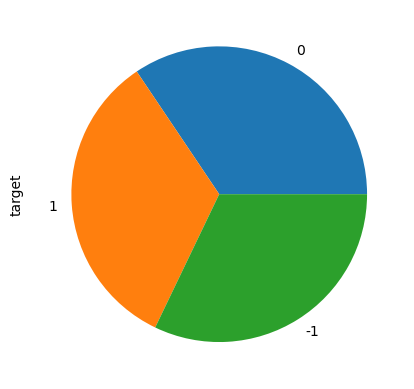

In [33]:
# plot a bar Chart for class

a['target'].value_counts().plot(kind='pie')

In [34]:
# Here we implement 5 classification models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model1=KNeighborsClassifier(n_neighbors=9,weights='uniform')
model2=MultinomialNB()
model3=SVC()
model4=DecisionTreeClassifier(criterion='entropy')
model5=RandomForestClassifier(n_estimators=100)

modellist=[model1,model2,model3,model4,model5]

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

for i in modellist:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('the classification details of model',i,'is below')
    print('the confusion matrix of ',i,'is')
    print( confusion_matrix(y_test,y_pred))
    print('accuracy score of',i,'is')
    print(accuracy_score(y_test,y_pred))
    print('the classification report of',i,'is')
    print(classification_report(y_test,y_pred))

the classification details of model KNeighborsClassifier(n_neighbors=9) is below
the confusion matrix of  KNeighborsClassifier(n_neighbors=9) is
[[58 13  8]
 [34 28 17]
 [36 15 40]]
accuracy score of KNeighborsClassifier(n_neighbors=9) is
0.5060240963855421
the classification report of KNeighborsClassifier(n_neighbors=9) is
              precision    recall  f1-score   support

          -1       0.45      0.73      0.56        79
           0       0.50      0.35      0.41        79
           1       0.62      0.44      0.51        91

    accuracy                           0.51       249
   macro avg       0.52      0.51      0.50       249
weighted avg       0.53      0.51      0.50       249

the classification details of model MultinomialNB() is below
the confusion matrix of  MultinomialNB() is
[[47 25  7]
 [14 44 21]
 [15 23 53]]
accuracy score of MultinomialNB() is
0.5783132530120482
the classification report of MultinomialNB() is
              precision    recall  f1-score   s